# Red Neuronal Profunda (DNN) para clasificación MNIST Modelo 12

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

In [1]:
import numpy as np
import tensorflow as tf

c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than th

In [2]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [3]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

In [5]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [6]:
num_obs_prueba = y_prueba.shape[0]

In [7]:
X_entreno_normalizado = X_entreno / 255

In [8]:
X_prueba_normalizado = X_prueba / 255

In [9]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

In [10]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

In [11]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

In [12]:
TAMANIO_TANDA = 64
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

In [13]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

In [14]:
tamanio_entrada = 784
tamanio_salida = 10

In [15]:
tamanio_capa_escondida = 520
tamanio_capa_escondida_2 = 300
tamanio_capa_escondida_3 = 250
tamanio_capa_escondida_4 = 130
tamanio_capa_escondida_5 = 60


# Definimos cómo se verá el modelo
 Se eligieron tres capas convolucionales con activación ReLU para extraer características como bordes y texturas, seguidas de capas de max pooling para reducir dimensionalidad y mejorar la generalización. La inclusión de BatchNormalization ayuda a estabilizar y acelerar el entrenamiento, mientras que la regularización mediante Dropout y penalización L2 se utilizó estratégicamente para mitigar el sobreajuste sin perder capacidad predictiva. 

In [16]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Seleccionar el optimizador y la función de pérdida

se eligió el optimizador RMSprop debido a su capacidad para adaptarse dinámicamente al ruido presente en los datos de imágenes, como las del conjunto MNIST. 

In [17]:
modelo.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

Epoch 1/5
782/782 - 18s - 23ms/step - accuracy: 0.9358 - loss: 0.2044 - val_accuracy: 0.9797 - val_loss: 0.0717
Epoch 2/5
782/782 - 24s - 31ms/step - accuracy: 0.9842 - loss: 0.0521 - val_accuracy: 0.9867 - val_loss: 0.0507
Epoch 3/5
782/782 - 29s - 37ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9888 - val_loss: 0.0398
Epoch 4/5
782/782 - 26s - 33ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9860 - val_loss: 0.0574
Epoch 5/5
782/782 - 27s - 35ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9912 - val_loss: 0.0340


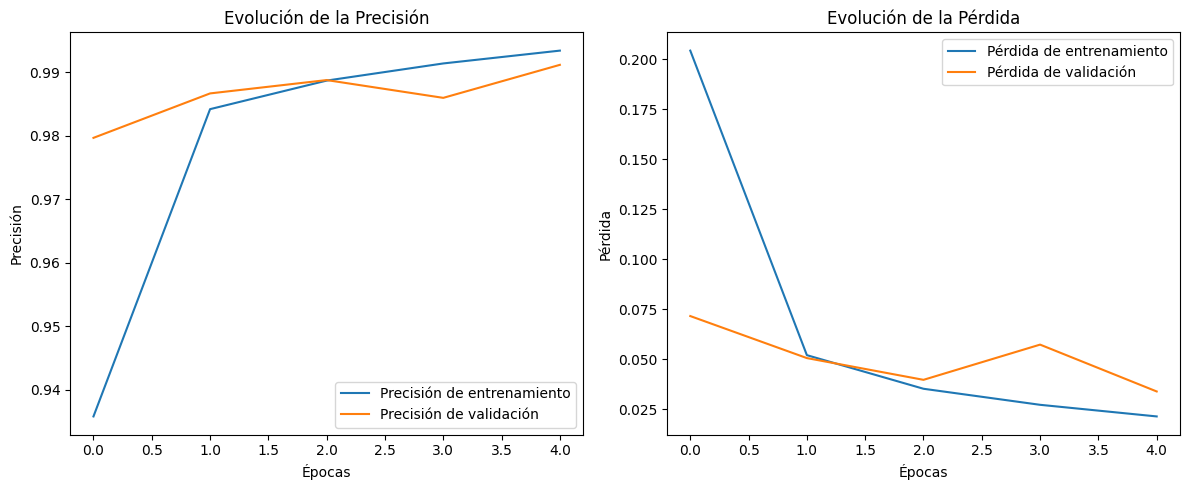

In [18]:
NUMERO_EPOCAS = 5


historial = modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

import matplotlib.pyplot as plt

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


## Probar el modelo

Esta gráfica muestra un sobreajuste (overfitting) que se hace evidente a partir de la época 2. El modelo alcanza su mejor rendimiento en los datos de validación alrededor de la época 2, donde la precisión de validación es alta y la pérdida de validación es baja. A partir de ese punto, continuar el entrenamiento no es beneficioso, ya que el modelo comienza a sobreajustarse. La mejor práctica sería haber detenido el entrenamiento en la época 2 o aplicar técnicas de regularización para evitar este comportamiento.

In [19]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9900 - loss: 6.7607


In [20]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 6.76. Precisión de prueba: 99.00%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.